In [59]:
import pandas as pd
from sklearn.inspection import permutation_importance
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.model_selection import cross_validate

https://scikit-learn.org/stable/modules/permutation_importance.html#:~:text=The%20permutation%20feature%20importance%20is,model%20depends%20on%20the%20feature.

In [2]:
train = pd.read_csv("s3://german-credit-20221001/datos/train/train.csv")
test = pd.read_csv("s3://german-credit-20221001/datos/test/test.csv")

In [9]:
sub_train, val = train_test_split(train, test_size=0.3, random_state=42)

In [10]:
sub_train

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
357,241,51,male,2,own,little,NaN,1595,6,radio/TV,good
649,411,35,male,3,own,little,NaN,7253,33,car,good
291,384,26,male,1,own,moderate,NaN,4272,30,business,good
420,671,31,male,2,own,moderate,NaN,5742,36,business,good
177,763,30,male,3,free,NaN,NaN,12680,21,car,bad
...,...,...,...,...,...,...,...,...,...,...,...
71,644,32,male,3,own,little,little,1880,18,radio/TV,good
106,880,38,male,3,own,little,NaN,7814,24,car,good
270,450,30,male,3,own,NaN,NaN,11054,36,car,good
435,38,37,male,2,own,little,rich,1225,10,domestic appliances,good


In [12]:
X_train  = sub_train.drop("Risk", axis=1)

In [14]:
y_train = sub_train["Risk"]

In [51]:
X_train = pd.get_dummies(X_train)

In [53]:
k_fold = KFold(n_splits=3)

In [57]:
for train_indices, val_indices in k_fold.split(X_train, y_train):
    X_sub_train = X_train.iloc[train_indices, :]
    y_sub_train = y_train.iloc[train_indices]
    X_val = X_train.iloc[val_indices, :]
    y_val = y_train.iloc[val_indices]

In [60]:
cross_validate(DecisionTreeClassifier(max_depth=3), X_train, y_train, cv=3,
              scoring="accuracy", return_train_score=True)

{'fit_time': array([0.00520992, 0.00453067, 0.00251818]),
 'score_time': array([0.00294232, 0.00194716, 0.00156069]),
 'test_score': array([0.65243902, 0.73006135, 0.68711656]),
 'train_score': array([0.78527607, 0.76146789, 0.76452599])}

In [19]:
X_val = pd.get_dummies(val.drop("Risk", axis=1))
y_val = val["Risk"]

In [27]:
model = DecisionTreeClassifier(max_depth=4)
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4)

In [28]:
r = permutation_importance(model, X_val, y_val, n_repeats=10)

In [36]:
r["importances"][0]

array([-0.00952381,  0.        , -0.0047619 , -0.00952381, -0.00952381,
       -0.00952381, -0.0047619 , -0.01428571, -0.0047619 , -0.00952381])

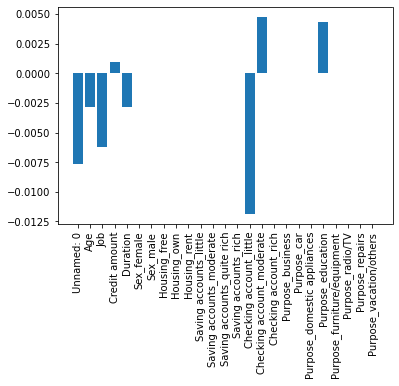

In [43]:
plt.bar(x=X_train.columns, height=r["importances_mean"])
plt.xticks(rotation=90)
plt.show()

In [44]:
r["importances_mean"].max()

0.0047619047619047224

In [47]:
accuracy_score(model.predict(X_val), y_val)

0.638095238095238